In [23]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster as clus
import pandas as pd
from PIL import Image

from bdpy.fig import makeplots, draw_group_image_set

In [2]:
load_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/'
load_base_dir = '../../results/res_umap'
save_base_dir = '../../results/assets/fig04/Umap_cluster_based_selected_images/'

network = 'pytorch/brain_diffuser_versatile_diffusion'
feat_name =  "text_encoder"#
#feat_name = 'vision_encoder'

os.makedirs(save_base_dir, exist_ok=True)

In [8]:
embedding_whole = np.load(os.path.join(load_base_dir, network, feat_name ,'nsd_embedding_norm.npy'))

In [9]:
nsd_umap = embedding_whole

In [11]:
cluster_num = 40 # our visual inspection
kmeans = clus.KMeans(n_clusters=cluster_num, random_state=0, n_init="auto")

In [12]:
# Fit
kmeans.fit(nsd_umap)

KMeans(n_clusters=40, n_init='auto', random_state=0)

In [13]:
kmeans.labels_

array([30, 30, 30, ...,  7,  4, 15], dtype=int32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


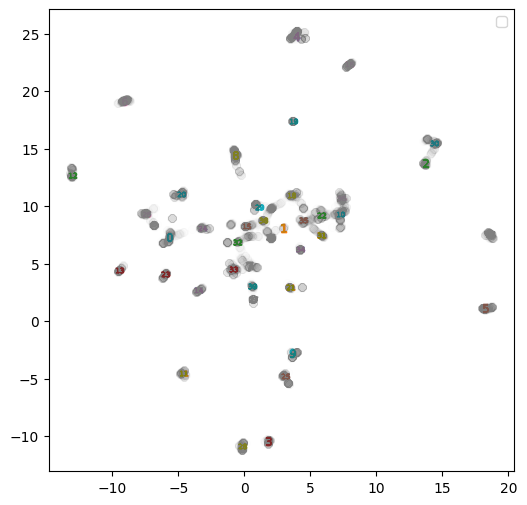

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
for i in range(40):
    x,y =np.median(nsd_umap[kmeans.labels_==i], 0)
    ax.scatter(x,y,  marker= f'${i}$')
    fig.show
ax.scatter(nsd_umap[:,0], nsd_umap[:,1], alpha=0.002, color='gray')
plt.legend()

In [15]:
cluster_labels = kmeans.labels_

In [17]:
nsd_hover_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/'
df_NSD_train = pd.read_csv(f'{nsd_hover_base_dir }/NSD_sub01_hover.csv')
df_NSD_train['Unnamed: 0'] = 'nsd-train'
num_train = len(df_NSD_train)
train_cluster_labels = cluster_labels[:num_train]

shuffle_train_cluster_labels = np.random.permutation(train_cluster_labels)

In [18]:
df_NSD_test = pd.read_csv(f'{nsd_hover_base_dir }/NSD_shared1000_hover.csv')
df_NSD_test['Unnamed: 0'] = 'nsd-test'
test_cluster_labels = cluster_labels[num_train:]

In [19]:
# add 100 for clusteres in training 

save_no_overlap_train_labels = train_cluster_labels + 100
save_shuffle_train_labels = shuffle_train_cluster_labels + 100
save_test_labels = test_cluster_labels

In [20]:
label_add_nsd_train_df = copy.copy(df_NSD_train)#[['Unnamed: 0', 'image id']]
label_add_nsd_test_df = copy.copy(df_NSD_test)#[['Unnamed: 0', 'image id']]

In [21]:
# add two cluster labels for traing and test df
label_add_nsd_train_df['no_overlap_clusters'] = save_no_overlap_train_labels
label_add_nsd_train_df['train_shuffled_clusters'] = save_shuffle_train_labels

label_add_nsd_test_df['no_overlap_clusters'] = test_cluster_labels
label_add_nsd_test_df['train_shuffled_clusters'] = test_cluster_labels

# merge two tables 
concat_df = pd.concat([label_add_nsd_train_df, label_add_nsd_test_df])
concat_df = concat_df.rename(columns={concat_df.columns[0]: 'data_cond'})

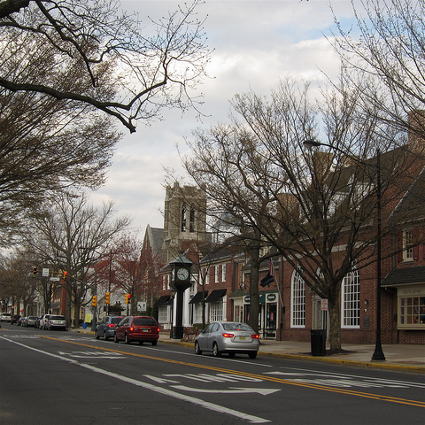

In [22]:

Image.open(concat_df['image_path'][cluster_labels==0].iloc[4])

In [28]:
cluster_list = np.arange(40)#[11] # “19: Airplane”, "13 bus",  “3. Ski”,  “6: Train”, "22 bird", “32 Zebra”,
df_all = concat_df

In [31]:
for cluster in cluster_list:
    #cluster_label = cluster_dict[cluster]
    train_target_cluster = df_all[df_all["no_overlap_clusters"] == cluster + 100]
    test_target_cluster = df_all[df_all["no_overlap_clusters"] == cluster]
    if len(test_target_cluster) >= 10:
        sampled_train_cluster = train_target_cluster.sample(10,random_state=1234)
        sampled_test_cluster = test_target_cluster.sample(10,random_state=1234)
    
    
    else:
        sampled_train_cluster = train_target_cluster.sample(len(test_target_cluster),random_state=1234)
        sampled_test_cluster = test_target_cluster.sample(len(test_target_cluster),random_state=1234)
        


    sampled_train_image_path = list(sampled_train_cluster['image_path'].values)
    sampled_test_image_path = list(sampled_test_cluster['image_path'].values)
    
    
    image_set = [
        {'title': f'TRAIN\ncluster_id_{cluster}',
        'image_filepath_list': sampled_train_image_path},

        {'title': f'TEST\ncluster_id_{cluster}',
                 'image_filepath_list': sampled_test_image_path}
    ]
    
    img = draw_group_image_set(
                image_set,
                max_column_size=10,
            )

    print(img)
    img.save(os.path.join(save_base_dir, f'randomly_selected_images_{cluster}.png'))
    img.save(os.path.join(save_base_dir, f'randomly_selected_images_{cluster}.pdf'))

<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95888B86D0>
<PIL.Image.Image image mode=RGB size=483x362 at 0x7F9569977130>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95887BA9D0>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95699771C0>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F9569716730>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95697AB460>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F9569977910>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95887BA610>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F9569977910>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F9569977190>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95888B8730>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95887BA610>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95887FB880>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F9569716760>
<PIL.Image.Image image mode=RGB size=1771x362 at 0x7F95887FB880>
<PIL.Image.Image image mod